In [1]:
import cv2 as cv

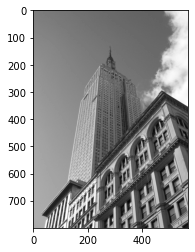

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')

In [3]:
local_region_size = 3 #size of local image regions W introduced in slide 6 in week 3 slides
kernel_size = 3 #kernel size of Sobel kernels used for calculating derivatives I_x and I_y
k = 0.04 #parameter k in side 6 in week 3 slides
threshold = 1000.0 #threshold theta introduced in slide 6 in week 3 slides

In [4]:
img_gray = np.float32(img_gray)

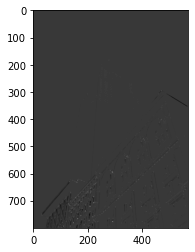

In [5]:
Harris_res_img = cv.cornerHarris(img_gray, local_region_size, kernel_size, k)
plt.imshow(Harris_res_img, 'gray')

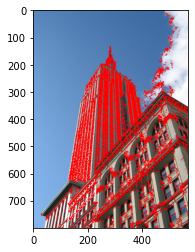

[1]Total corners detected: 87282 using thresh:  1000.0


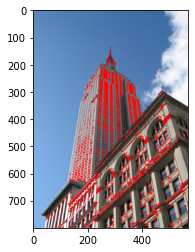

Total corners detected: 39280 using thresh:  94003.416


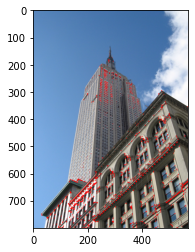

Total corners detected: 10896 using thresh:  940034.16


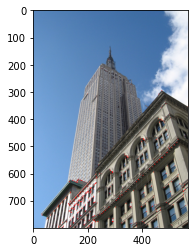

Total corners detected: 2276 using thresh:  4700170.8


In [6]:
def GetCorners(threshold):
    highlighted_colour = [0, 0, 255] # a colour is a combination of blue, green, red; red=[0,0,255]
    highlighted_img = img.copy()
    highlighted_img[Harris_res_img > threshold] = highlighted_colour
    plt.imshow(highlighted_img[:,:,::-1]) # RGB-> BGR
    plt.show()
    
    numCorners = 0
    for i in range(Harris_res_img.shape[0]):
        for j in range(Harris_res_img.shape[1]):
            if (Harris_res_img[i,j] > threshold):
                numCorners += 1
    return numCorners

print ("[1]Total corners detected:", GetCorners(threshold), "using thresh: ", threshold)

threshold_list = [0.001, 0.01, 0.05]
for thresh_mul in threshold_list:
    thresh = thresh_mul * Harris_res_img.max()
    print ("Total corners detected:", GetCorners(thresh), "using thresh: ", thresh)

In [7]:
sift = cv.xfeatures2d.SIFT_create()

In [8]:
# You need re-create img_gray as its previous version have been converted to float
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kp = sift.detect(img_gray, None)

Number of detected keypoints: 2804


True

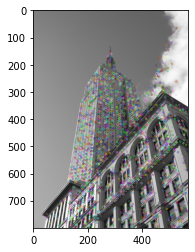

In [9]:
img_gray_kp = img_gray.copy()
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp)
plt.imshow(img_gray_kp)
print("Number of detected keypoints: %d" % (len(kp)))
cv.imwrite('img_gray_kp.png', img_gray_kp)

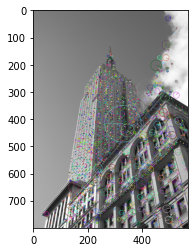

In [10]:
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_gray_kp)

In [11]:
kp, des = sift.compute(img_gray, kp)
print(des.shape)

(2804, 128)


In [12]:
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another = cv.imread('fisherman.jpg')
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [13]:
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [14]:
print("The number of keypoints in img_gray is %d" % (len(des)))
print("The number of keypoints in img_45_gray is %d" % (len(des_45)))

The number of keypoints in img_gray is 2804
The number of keypoints in img_45_gray is 3290


In [15]:
from scipy.spatial.distance import directed_hausdorff

In [22]:
h_des_des_45 = directed_hausdorff(des, des_45)
h_des_45_des = directed_hausdorff(des_45, des)
H_des_des_45 = max(h_des_des_45, h_des_45_des)
print(H_des_des_45[0])

400.4697241989711


In [23]:
h_des_des_zoomedout = directed_hausdorff(des, des_zoomedout)
h_des_zoomedout_des = directed_hausdorff(des_zoomedout, des)
H_des_des_zoomedout = max(h_des_des_zoomedout, h_des_zoomedout_des)
print(H_des_des_zoomedout[0])

401.33651715237676


In [24]:
h_des_des_another = directed_hausdorff(des, des_another)
h_des_another_des = directed_hausdorff(des_another, des)
H_des_des_another = max(h_des_des_another, h_des_another_des)
print(H_des_des_another[0])

433.89630097524457
